# Case Hotmart 

#### Objetivos: 
* Avalair a base de vendas a fim de extrair insights e conclusões para aumento de receita nas dimensões dos produtores, produtos, compradores e afiliados.
</br> 

#### Índice
1. [Extração do Dataset](#extract)<br>
2. [Overview Dataset](#overview)<br>
    2.1 [Missing Values](#missing)<br>
    2.2 [Distribuição das Variáveis Categóricas](#categorical)<br>
    2.3 [Distribuição das Variáveis Numéricas](#numerical)<br>
3. [Evolução Temporal](#series)<br>
4. [Produtores](#produtos)<br>
5. [Afiliados](#afiliados)<br>
6. [Clientes](#clientes)<br>
7. [Produtos](#produtos)<br>
8. [Conclusões](#conclusoes)<br>



In [1]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
 } else {
 $('div.input').show();
 $('div .jp-CodeCell .jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code on/off"></form>''')

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
%matplotlib inline

<a id="extract"></a>
## Extração da Base de Dados

In [18]:
from sqlalchemy import create_engine
connection_string =  "XXX"
engine = create_engine(connection_string, pool_recycle=3600)

In [38]:
df = pd.read_sql_query("SELECT * FROM sales_data", 
                       con = engine, 
                       parse_dates = ['purchase_date', 'product_creation_date'])

In [39]:
df.to_csv('data.csv', index = False)

<a id="overview"></a>
## Overview do Dataset

Nessa etapa, vou checar a consistência do dataset em termos das distribuições das variáveis categóricas e numéricas, outliers e missing values.

In [2]:
df = pd.read_csv('data.csv', parse_dates = ['purchase_date', 'product_creation_date'])
df = df.iloc[1:,]
for col in [x for x in df.columns if 'id' in x]:
    df[col] = df[col].astype(int).astype(str)


In [3]:
def default_plot_layout(ax, title, xlabel, ylabel):
    ax.set_title(title, size = 16)
    ax.set_ylabel(ylabel, size = 14)
    ax.set_xlabel(xlabel, size = 14)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    
def fill_percentage(ax, total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total * 100),
                ha="center", fontsize = 12) 

Como o dataset se parece: 

In [6]:
df.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network
1,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,50.0,Smart TV,Origin ef2b,"0,0"
2,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.177077,60.0,Smart TV,Origin ef2b,"0,0"
3,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.468989,0.0,Smart TV,Origin ef2b,"0,0"
4,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.401168,50.0,Smart TV,Origin ef2b,"0,0"
5,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.452489,50.0,Smart TV,Origin ef2b,"0,0"


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599828 entries, 1 to 1599828
Data columns (total 14 columns):
purchase_id                        1599828 non-null object
product_id                         1599828 non-null object
affiliate_id                       1599828 non-null object
producer_id                        1599828 non-null object
buyer_id                           1599828 non-null object
purchase_date                      1599828 non-null datetime64[ns]
product_creation_date              1599828 non-null datetime64[ns]
product_category                   1599828 non-null object
product_niche                      1599828 non-null object
purchase_value                     1599828 non-null float64
affiliate_commission_percentual    1599828 non-null float64
purchase_device                    1599828 non-null object
purchase_origin                    1599828 non-null object
is_origin_page_social_network      1599828 non-null object
dtypes: datetime64[ns](2), float64(2), obje

Temos apenas duas variáveis númericas. Suas distribuições são representadas abaixo.

In [90]:
df.describe()

,purchase_value,affiliate_commission_percentual
count,1.599828e+06,1.599828e+06
mean,1.248490e-08,7.597402e+00
std,1.000000e+00,1.847787e+01
min,-5.412400e-01,0.000000e+00
25%,-4.530150e-01,0.000000e+00
50%,-3.499980e-01,0.000000e+00
75%,6.492290e-02,0.000000e+00
max,1.245610e+02,1.000000e+02


<a id="missing"></a>
### Missing Values

Vamos verificar a quantidade de missing values por coluna. 

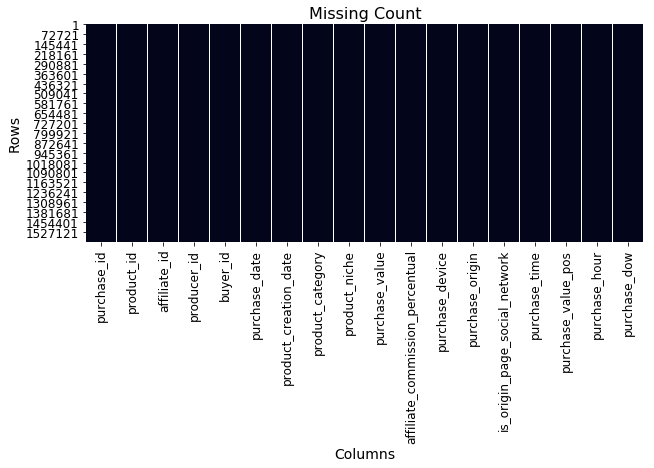

In [96]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df.isnull(), cbar=False)
default_plot_layout(ax, title = 'Missing Count', xlabel = 'Columns', ylabel = 'Rows')

Não temos nenhum problema com esse dataset em termos de missing values. Podemos seguir em frente com as análises.

<a id="categorical"></a>
### Distribuição das Variáveis Categóricas

Vamos verificar as distribuições das variáveis categóricas. 

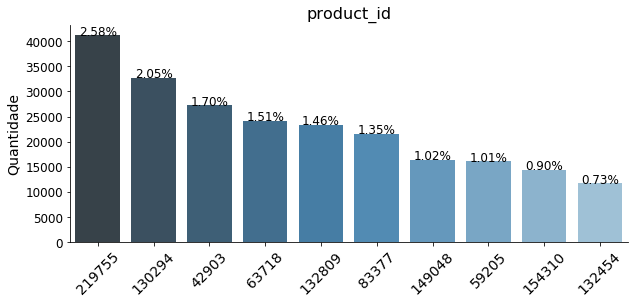

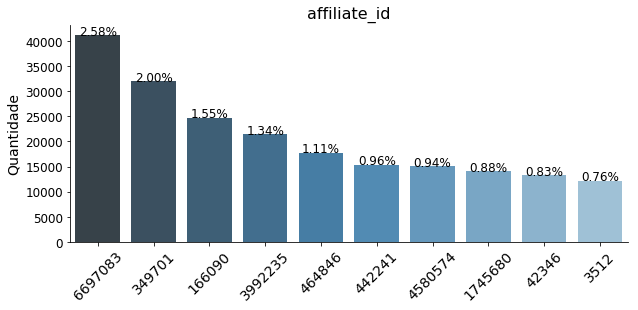

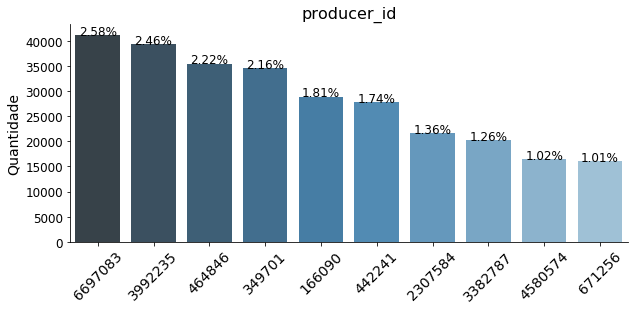

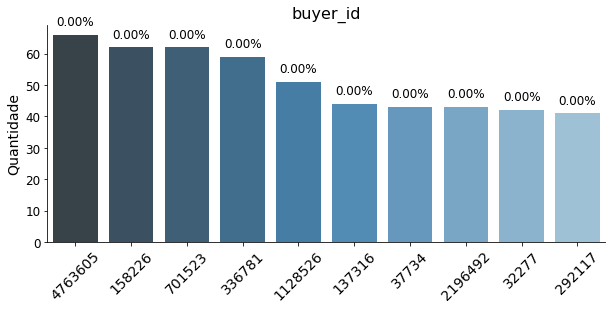

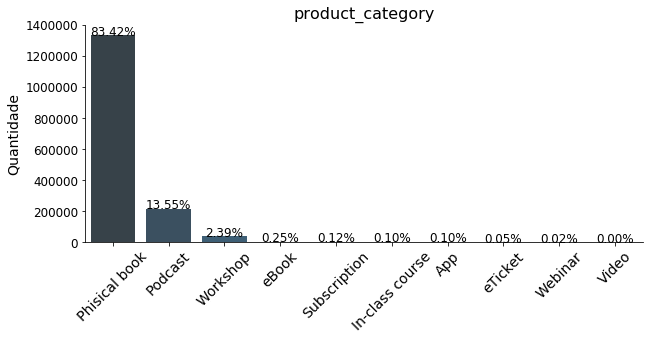

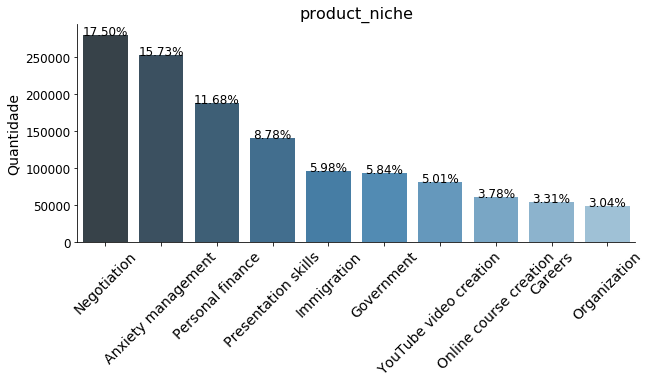

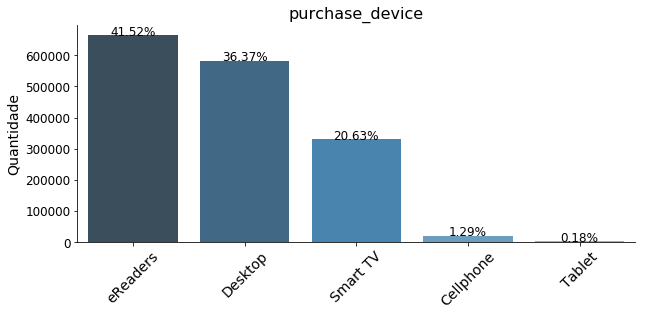

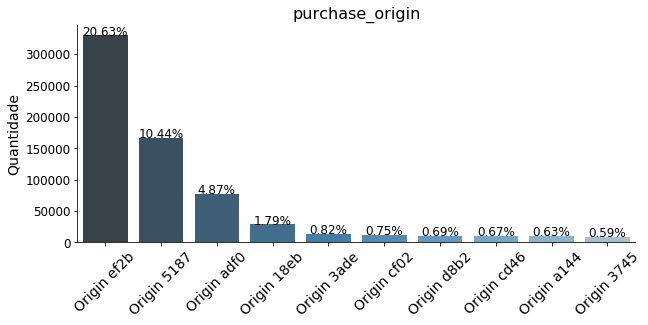

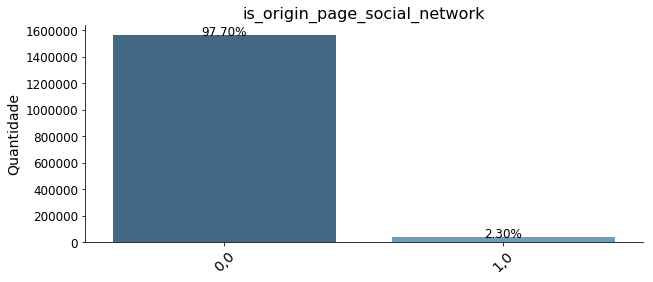

In [7]:
max_groups = 10
for col, dtype in df.dtypes.items():
    if col == 'purchase_id':
        continue
    if dtype == np.object:
        plt.figure(figsize=(10, 4))
        ax = sns.countplot(x = col, data = df, palette="Blues_d", order= df[col].value_counts().iloc[:max_groups].index)
        default_plot_layout(ax, title = col, xlabel = '', ylabel = 'Quantidade')
        plt.xticks(rotation = 45, size = 14)
        total = len(df)
        fill_percentage(ax, total)
            
        plt.show()

<a id="numerical"></a>
### Distribuição das Variáveis Númericas

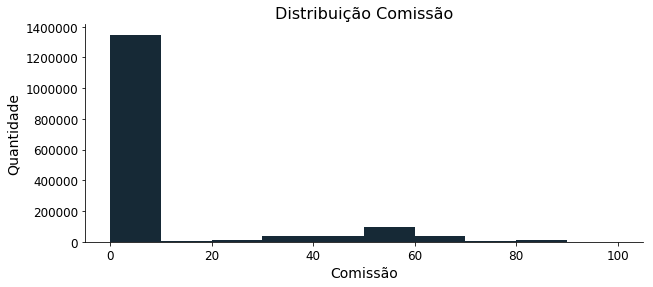

In [691]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)

df['affiliate_commission_percentual'].hist(color = '#162936')
ax.grid(False)
default_plot_layout(ax, title = 'Distribuição Comissão', xlabel = 'Comissão', ylabel = 'Quantidade')

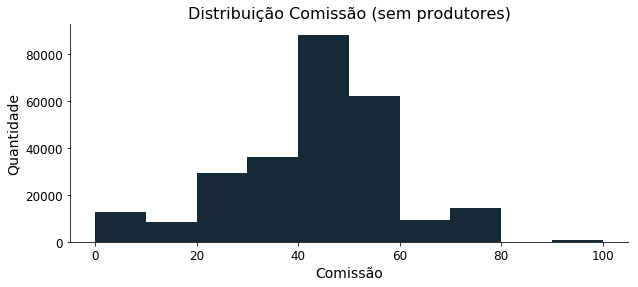

In [693]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
df[df['affiliate_commission_percentual'] > 0]['affiliate_commission_percentual'].hist(color = '#162936')
ax.grid(False)
default_plot_layout(ax, title = 'Distribuição Comissão (sem produtores)', xlabel = 'Comissão', ylabel = 'Quantidade')

In [695]:
df['no_affliate'] = df['producer_id'] == df['affiliate_id']

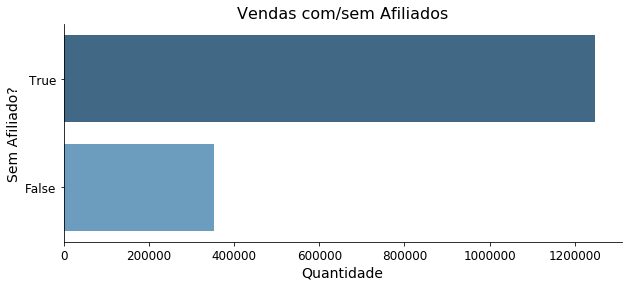

In [698]:
max_groups = 10

plt.figure(figsize=(10, 4))

ax =  sns.countplot(y = 'no_affliate', data = df, palette="Blues_d", order= df['no_affliate'].value_counts().iloc[:max_groups].index)
default_plot_layout(ax, title = 'Vendas com/sem Afiliados', xlabel = 'Quantidade', ylabel = 'Sem Afiliado?')

plt.show()

#### Analisando Purchase Value

Para as análises de purchase value, vou reverter o cálculo do z-score com uma média e desvio padrão aleatórios (apenas para os números ficarem positivos, como é o caso real). Portanto, quais análises a seguir utilizando a variávei purchase value devem ser consideradas de forma relativa e não em termos absolutos. 

In [4]:
mean = 5
std = 1
df['purchase_value_pos'] = df['purchase_value'] * std + mean
TOTAL_PURCHASE_VALUE = df['purchase_value_pos'].sum()

<a id="series"></a>
## Evolução Temporal

### Faturamento x Compras 

Nesse tópico, vamos avaliar as séries temporais de venda. Vamos plotar um overview de como as vendas se comportam ao longo do tempo, a fim de identificar tendências.

In [136]:
print(df['purchase_date'].min(), df['purchase_date'].max())

2016-01-01 00:00:27 2016-06-30 23:59:57


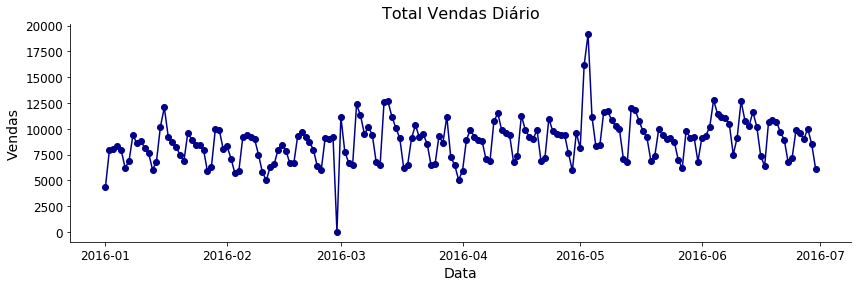

In [735]:
orders = df.groupby(pd.Grouper(key = 'purchase_date', freq = 'D'))['purchase_id'].count().reset_index()
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)

plt.plot(orders['purchase_date'], orders['purchase_id'], color = 'darkblue', marker = 'o')

default_plot_layout(ax, title = 'Total Vendas Diário', xlabel = 'Data', ylabel = 'Vendas')


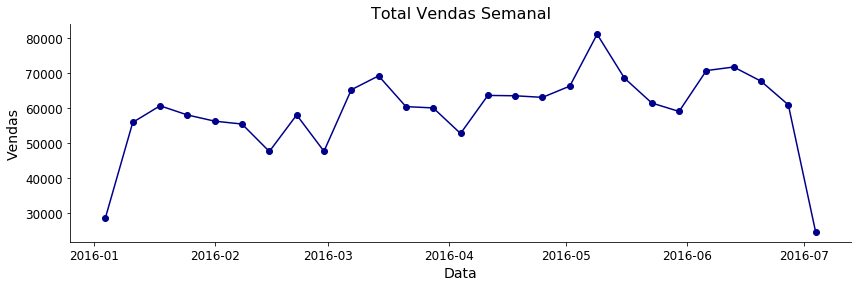

In [736]:
orders = df.groupby(pd.Grouper(key = 'purchase_date', freq = 'W-MON'))['purchase_id'].count().reset_index()
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)

plt.plot(orders['purchase_date'], orders['purchase_id'],  color = 'darkblue', marker = 'o')
default_plot_layout(ax, title = 'Total Vendas Semanal', xlabel = 'Data', ylabel = 'Vendas')


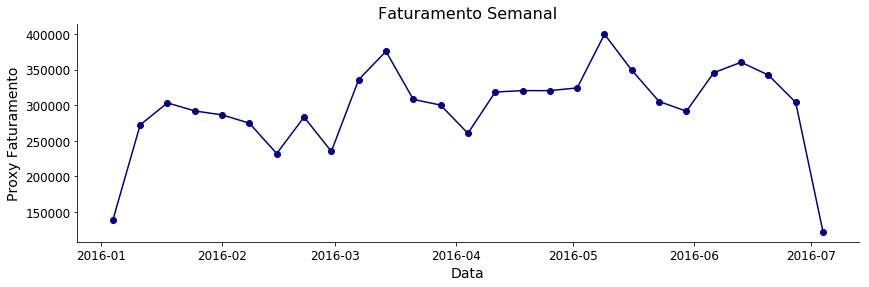

In [741]:
orders = df.groupby(pd.Grouper(key = 'purchase_date', freq = 'W-MON'))['purchase_value_pos'].sum().reset_index()
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)
plt.plot(orders['purchase_date'], orders['purchase_value_pos'],  color = 'darkblue', marker = 'o')
default_plot_layout(ax, title = 'Faturamento Semanal', xlabel = 'Data', ylabel = 'Proxy Faturamento')


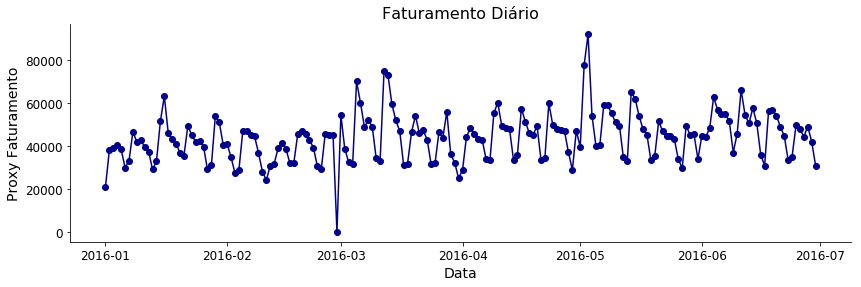

In [742]:
orders = df.groupby(pd.Grouper(key = 'purchase_date', freq = 'D'))['purchase_value_pos'].sum().reset_index()
plt.figure(figsize=(14, 4))

ax = plt.subplot(111)
plt.plot(orders['purchase_date'], orders['purchase_value_pos'],  color = 'darkblue', marker = 'o')
default_plot_layout(ax, title = 'Faturamento Diário', xlabel = 'Data', ylabel = 'Proxy Faturamento')


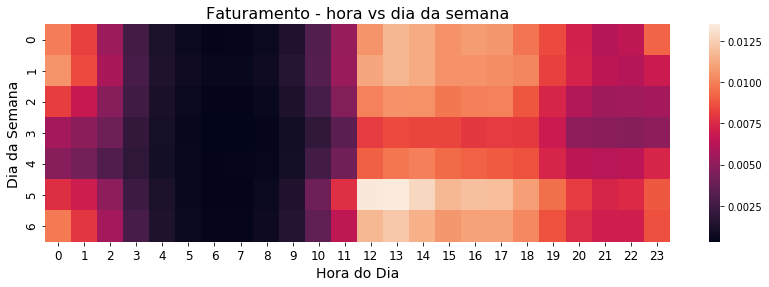

In [743]:
df['purchase_hour'] = df['purchase_date'].dt.hour
df['purchase_dow'] = df['purchase_date'].dt.weekday
orders = df.groupby([df['purchase_hour'], df['purchase_dow']])['purchase_value_pos'].count().reset_index()
orders['purchase_value_pos'] = orders['purchase_value_pos'] / orders['purchase_value_pos'].sum()
plt.figure(figsize=(14, 4))
ax = sns.heatmap(orders.pivot('purchase_dow', 'purchase_hour', 'purchase_value_pos'))

default_plot_layout(ax, title = 'Faturamento - hora vs dia da semana', xlabel = 'Hora do Dia', ylabel = 'Dia da Semana')

plt.show()

Vemos que o faturamento está concentrado no período da tarde (entre 12:00 e 19:00). Já em relação aos dias da semana, Sábado e Domingo possuem maior faturamento relativo. 

<a id="produtores"></a>
## Produtores

### Concentração de Faturamento por Produtor

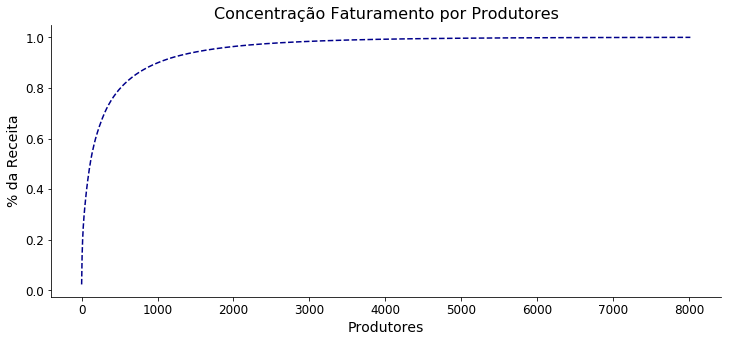

In [699]:
var = 'purchase_value_pos'
g_by = 'producer_id'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.plot(np.arange(len(vals)), vals['cum'], color = 'darkblue', linestyle = '--')
default_plot_layout(ax, title = 'Concentração Faturamento por Produtores', xlabel = 'Produtores', ylabel = '% da Receita')


Faturamento é bastante concentrado. Cerca de 80% está concentrado em cerca de 500 produtores que representa em média ~6% da base. 

### Performance dos Produtores

Vamos avaliar nessa seção como os produtores estão performando em vendas.

In [28]:
df_producer = df.groupby('producer_id')['product_id'].nunique().sort_values().reset_index()

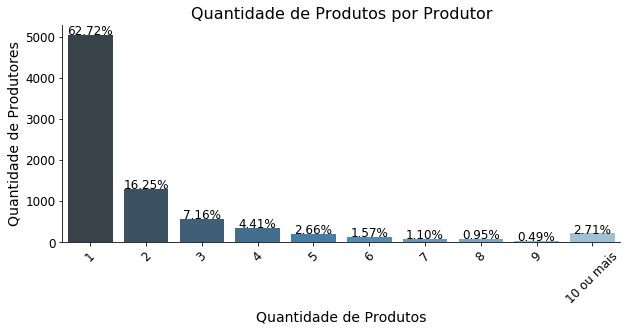

In [29]:
df_producer['bucket'] =  df_producer['product_id'].clip(1,10)
bkt_df = df_producer.groupby('bucket')['product_id'].count().reset_index()

labels = [str(x) for x in sorted(bkt_df['bucket'].values)]
labels[-1] = "10 ou mais"

plt.figure(figsize=(10, 4))
ax = sns.barplot('bucket', 'product_id', data = bkt_df, palette="Blues_d")

total = bkt_df['product_id'].sum()
fill_percentage(ax, total)
default_plot_layout(ax, title = 'Quantidade de Produtos por Produtor', xlabel = 'Quantidade de Produtos', ylabel = 'Quantidade de Produtores')
    
plt.xticks(np.arange(len(bkt_df)), labels, size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

Grande parte dos produtores possuem apenas um produto vendido na base. Vamos avaliar a distribuição de idade dos produtos vendidos (abaixo)

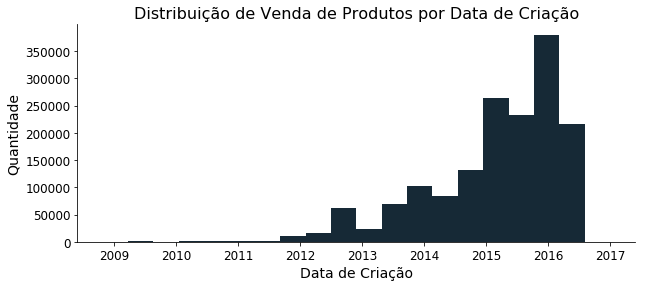

In [35]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
df['product_creation_date'].hist(color = '#162936', bins = 20)
ax.grid(False)
default_plot_layout(ax, title = 'Distribuição de Venda de Produtos por Data de Criação', xlabel = 'Data de Criação', ylabel = 'Quantidade')

Como esperado, produtos mais recentes (criação a partir de 2015), foram mais vendidos do que o restante. Vamos avaliar a quantidade de categorias e nichos diferentes por produtor

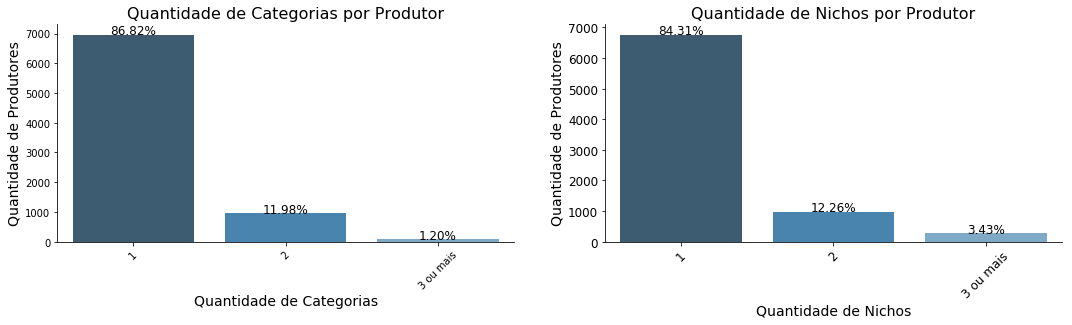

In [47]:
df_producer = df.groupby('producer_id')['product_category'].nunique().sort_values().reset_index()
df_producer['bucket'] =  df_producer['product_category'].clip(1,3)
bkt_df = df_producer.groupby('bucket')['product_category'].count().reset_index()

labels = [str(x) for x in sorted(bkt_df['bucket'].values)]
labels[-1] = "3 ou mais"

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

axi = sns.barplot('bucket', 'product_category', data = bkt_df, palette="Blues_d", ax = ax[0])

total = bkt_df['product_category'].sum()
fill_percentage(axi, total)
default_plot_layout(axi, title = 'Quantidade de Categorias por Produtor', xlabel = 'Quantidade de Categorias', ylabel = 'Quantidade de Produtores')    
axi.set_xticklabels(labels, rotation = 45)

df_producer = df.groupby('producer_id')['product_niche'].nunique().sort_values().reset_index()
df_producer['bucket'] =  df_producer['product_niche'].clip(1,3)
bkt_df = df_producer.groupby('bucket')['product_niche'].count().reset_index()

labels = [str(x) for x in sorted(bkt_df['bucket'].values)]
labels[-1] = "3 ou mais"

axi = sns.barplot('bucket', 'product_niche', data = bkt_df, palette="Blues_d", ax = ax[1])

total = bkt_df['product_niche'].sum()
fill_percentage(axi, total)
default_plot_layout(axi, title = 'Quantidade de Nichos por Produtor', xlabel = 'Quantidade de Nichos', ylabel = 'Quantidade de Produtores')
axi.set_xticklabels( labels, rotation = 45)
plt.show()


A distribuição de nichos e categorias dos produtores são bem semelhantes. Podemos ver que grande parte dos produtores exploram apenas um tipo de categoria ou de nicho.

<a id="afiliados"></a>
## Afiliados

Vamos analisar os afiliados e tentar entender tendências e se podemos extrair algum insight para aumentar vendas. Vamos desconsiderar nessas análises todos as vendas feitas pelos próprios produtores. 

* Perfil dos afiliados (produtos, devices, nichos)
* Um produtor X consegue vender mais com um afiliado ou sem? 
* Quais são os melhores afiliados? E como podemos melhorar a skill deles para aumentar vendas

### Concentração de Faturamento por Afiliados

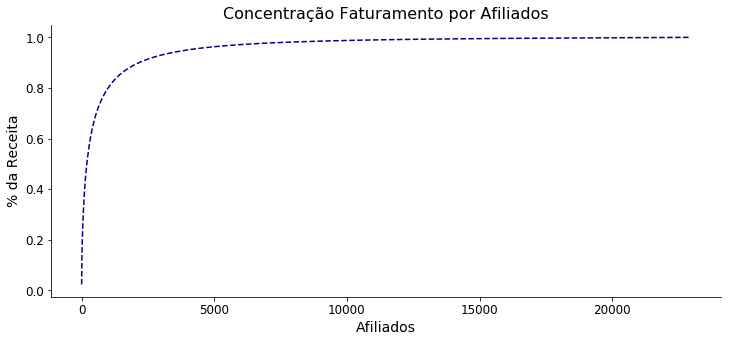

In [717]:
var = 'purchase_value_pos'
g_by = 'affiliate_id'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.plot(np.arange(len(vals)), vals['cum'], color = 'darkblue', linestyle = '--')
default_plot_layout(ax, title = 'Concentração Faturamento por Afiliados', xlabel = 'Afiliados', ylabel = '% da Receita')


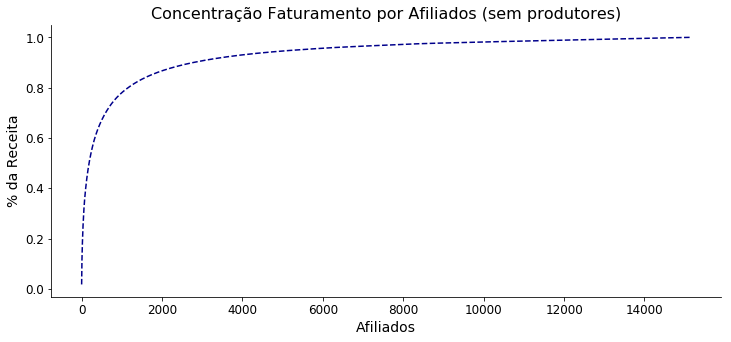

In [722]:
var = 'purchase_value_pos'
g_by = 'affiliate_id'
vals = df[df['affiliate_commission_percentual'] > 0].groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.plot(np.arange(len(vals)), vals['cum'], color = 'darkblue', linestyle = '--')
default_plot_layout(ax, title = 'Concentração Faturamento por Afiliados (sem produtores)', xlabel = 'Afiliados', ylabel = '% da Receita')


Assim como no caso dos produtores, o faturamento está bastante concentrado. Cerca de 80% do faturamento concentrados em ~4% dos afiliados, mesmo ao desconsideramos os produtos vendidos pelos próprios produtores, a concentração de 80% do faturamento sobe para ~8% da base de afiliados, permanecendo ainda bem concentrada.

### Performance dos Afiliados

Vamos verificar agora como é a performance dos afiliados, estudando a distribuição da comissão.


In [601]:
affiliate_df = df.groupby(['affiliate_id', 'product_id']).agg({'affiliate_commission_percentual' : {'median_comission': lambda x: x.median()},
                               'purchase_id' : {'sales' : lambda x: x.count()}}).reset_index()

affiliate_df.columns = affiliate_df.columns.droplevel()
cols = list(affiliate_df.columns)
cols[0] = 'affiliate_id'
cols[1] = 'product_id'
affiliate_df.columns = cols
 
affiliate_df = affiliate_df[(affiliate_df['median_comission'] > 0) & (affiliate_df['sales'] > 1)] # queremos remover os produtores e produtos que foram vendidos apenas uma vez

/usr/local/lib/python3.5/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  Series


In [602]:
product_df = affiliate_df.groupby('product_id').agg({'affiliate_id' : lambda x: x.count(), 'sales' : lambda x: x.sum()}).reset_index()

In [603]:
bins_sales = np.linspace(0, 200, 11)
sales_labels = ["De {0} até {1}".format(int(bins_sales[x]), int(bins_sales[x + 1])) for x  in np.arange(0, len(bins_sales) - 2)]
sales_labels.append('{0} ou mais'.format(int(bins_sales[-2])))
product_df['sales_bin'] = pd.cut(product_df['sales'].clip(0,200 - 1), bins = bins_sales, right = False, labels = np.arange(len(sales_labels)))

bins_affiliate = np.linspace(0, 20, 6)
affi_labels = ["De {0} até {1}".format(int(bins_affiliate[x]), int(bins_affiliate[x + 1])) for x  in np.arange(0, len(bins_affiliate) - 2)]
affi_labels.append('{0} ou mais'.format(int(bins_affiliate[-2])))
product_df['affiliate_bin'] = pd.cut(product_df['affiliate_id'].clip(0,20 - 1), bins = bins_affiliate, right = False, labels = np.arange(len(affi_labels)))

df_sales_affiliate = product_df.groupby(['sales_bin', 'affiliate_bin'])['product_id'].count().reset_index()
df_sales =  product_df.groupby(['sales_bin'])['product_id'].count().reset_index()
df_sales.columns = ['sales_bin', 'total']

df_sales_affiliate = pd.merge(left = df_sales_affiliate, right = df_sales, on = 'sales_bin', how = 'left')
df_sales_affiliate['perc_occ'] = df_sales_affiliate['product_id'] / df_sales_affiliate['total']

In [604]:
df_sales_affiliate['affiliate_bin'] = df_sales_affiliate['affiliate_bin'].astype(str)
df_sales_affiliate['sales_bin'] = df_sales_affiliate['sales_bin'].astype(str)
categories = list(df_sales_affiliate['affiliate_bin'].unique())

df_sales_affiliate = df_sales_affiliate.groupby('sales_bin',as_index=False).apply(lambda x : x.set_index('affiliate_bin').reindex(categories)).fillna(0).reset_index().drop('level_0',1)
df_sales_affiliate['sales_bin'] = df_sales_affiliate['sales_bin'].replace(0, method = 'ffill')

df_sales_affiliate = df_sales_affiliate.sort_values(['sales_bin', 'affiliate_bin'])

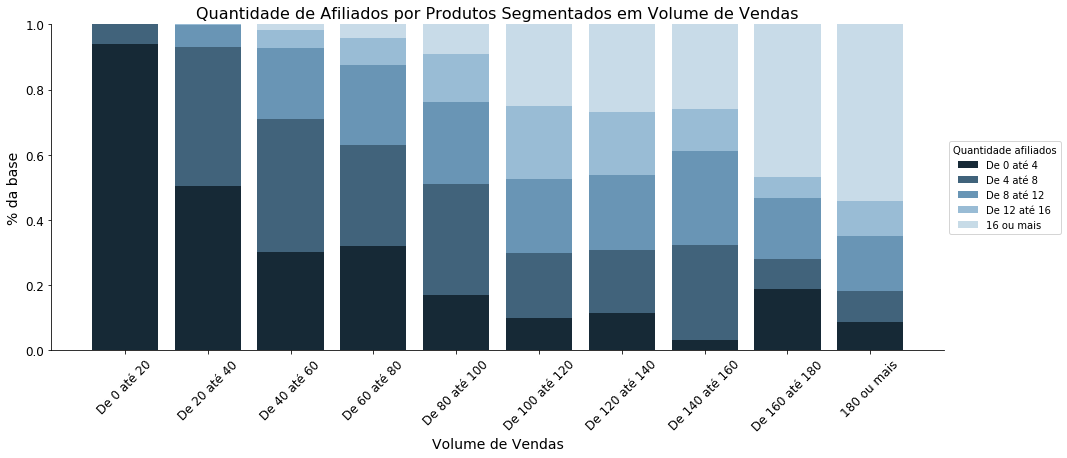

In [606]:
plt.figure(figsize=(16, 6))

ax = plt.subplot(111)
ps = []
affs = []
i = 0 

alpha = 1.0

# colors = ['#011f4b', '#03396c', '#005b96', '#6497b1', '#b3cde0']
colors = ['#162936', '#2c526d', '#437ba3',  '#6ea0c4', '#a4c4da' ,'#c9dbe9']
df_sales_affiliate = df_sales_affiliate.sort_values(['sales_bin', 'affiliate_bin'])

for aff, aff_df in df_sales_affiliate.groupby('affiliate_bin'):
    if i == 0:
        ps.append(plt.bar(np.arange(aff_df['sales_bin'].nunique()), aff_df['perc_occ'], alpha = alpha, color = colors[i]))
        plt.xticks(np.arange(aff_df['sales_bin'].nunique()), sales_labels, rotation = 45)
        previous = aff_df['perc_occ'].values
    else:
        ps.append(plt.bar(np.arange(aff_df['sales_bin'].nunique()), aff_df['perc_occ'], bottom = previous, alpha = alpha, color = colors[i]))
        previous += aff_df['perc_occ'].values
        
    alpha -= 0.1
    i += 1


plt.legend(ps, affi_labels, loc='center left', bbox_to_anchor=(1, 0.5), title = 'Quantidade afiliados')
default_plot_layout(ax, title = 'Quantidade de Afiliados por Produtos Segmentados em Volume de Vendas', xlabel = 'Volume de Vendas', ylabel = '% da base')
    
plt.show()

Para todas as faixas de vendas, grande parte dos produtos são vendidos por menos que 16 afiliados. Para produtos com mais de 160 vendas, percentual de 16 ou mais afiliados aumenta consideravelmente (~54% para produtos vendidos 180 ou mais vezes), no entanto, o volume dessas faixas de venda é pequeno. Portanto, para volume de base, 16 ou menos afiliados é mais relevantes. 

Dessa forma, vamos analisar então para essas faixas de afiliados, algumas tendências. 

In [646]:
df_com = df.copy(deep = True)

com_bin = np.linspace(0,100,6)
com_labels = ["De {0} até {1}".format(int(com_bin[x]), int(com_bin[x + 1])) for x  in np.arange(0, len(com_bin) - 2)]
com_labels.append('{0} ou mais'.format(int(com_bin[-2])))
df_com['com_bin'] = pd.cut(df_com['affiliate_commission_percentual'].clip(0,100 - 1), bins = com_bin, right = False, labels = np.arange(len(com_labels)))


df_com = df_com[df_com['affiliate_commission_percentual'] > 0].groupby(['product_category', 'com_bin'])['purchase_id'].count().reset_index()

df_product_cat = df[df['affiliate_commission_percentual'] > 0].groupby('product_category')['purchase_id'].count().reset_index()
df_product_cat.columns = ['product_category', 'total_sales']

df_com = pd.merge(left = df_com, right = df_product_cat, on ='product_category', how = 'left')
df_com['perc_sales'] = df_com['purchase_id'] / df_com['total_sales']

In [647]:
df_com['com_bin'] = df_com['com_bin'].astype(str)
df_com['product_category'] = df_com['product_category'].astype(str)
categories = list(df_com['com_bin'].unique())

df_com = df_com.groupby('product_category',as_index=False).apply(lambda x : x.set_index('com_bin').reindex(categories)).fillna(0).reset_index().drop('level_0',1)

prods = list(df_com['product_category'].unique())
prods.remove(0)

prods_full = []
_ = [prods_full.extend([x] * 5) for x in prods]
df_com['product_category'] = prods_full

# df_com['product_category'] = df_com['product_category'].replace(0, method = 'ffill')

df_com = df_com.sort_values(['product_category', 'com_bin'])

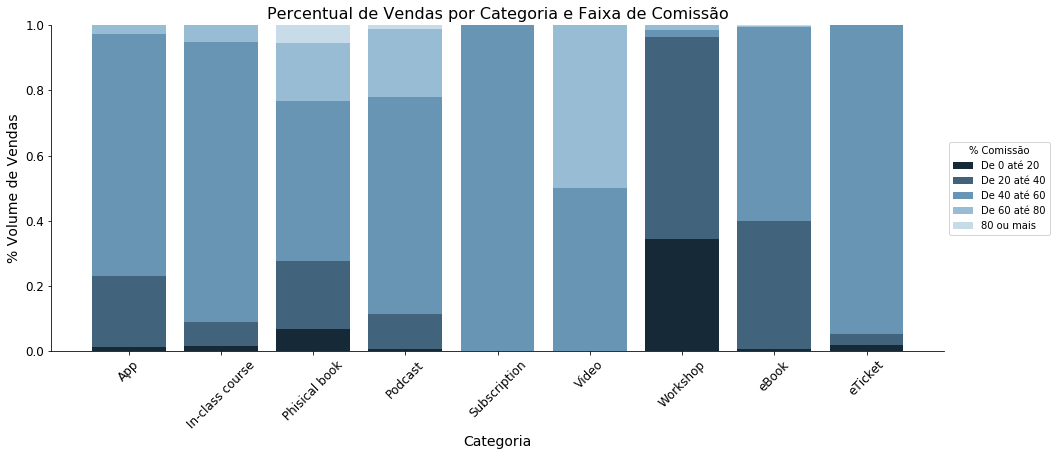

In [650]:
plt.figure(figsize=(16, 6))
(179,205,224)

ax = plt.subplot(111)
ps = []
affs = []
i = 0 

alpha = 1.0

colors = ['#162936', '#2c526d', '#437ba3',  '#6ea0c4', '#a4c4da' ,'#c9dbe9']

df_com = df_com.sort_values(['product_category', 'com_bin'])

for aff, aff_df in df_com.groupby('com_bin'):
    if i == 0:
        ps.append(plt.bar(np.arange(aff_df['product_category'].nunique()), aff_df['perc_sales'], alpha = alpha, color = colors[i]))
        plt.xticks(np.arange(aff_df['product_category'].nunique()), aff_df['product_category'].unique(), rotation = 45)
        previous = aff_df['perc_sales'].values
    else:
        ps.append(plt.bar(np.arange(aff_df['product_category'].nunique()), aff_df['perc_sales'], bottom = previous, alpha = alpha, color = colors[i]))
        previous += aff_df['perc_sales'].values
        
    alpha -= 0.1
    i += 1


plt.legend(ps, com_labels, loc='center left', bbox_to_anchor=(1, 0.5), title = '% Comissão')
default_plot_layout(ax, title = 'Percentual de Vendas por Categoria e Faixa de Comissão', xlabel = 'Categoria', ylabel = '% Volume de Vendas')
    
plt.show()

A diferença de perfil de comissão mais significativa se dá na categoria de workshops que possui uma tendência a comissões menores (até 40%). Já entre Livros e Podcast, podemos falar que livros possui maior parcela de comissões baixas (~30% do volume até 40% de comissão), enquanto Podcasts possui ~10% do volume até 40% de comissão.

<a id="clientes"></a>
## Clientes

### Concentração de Faturamento

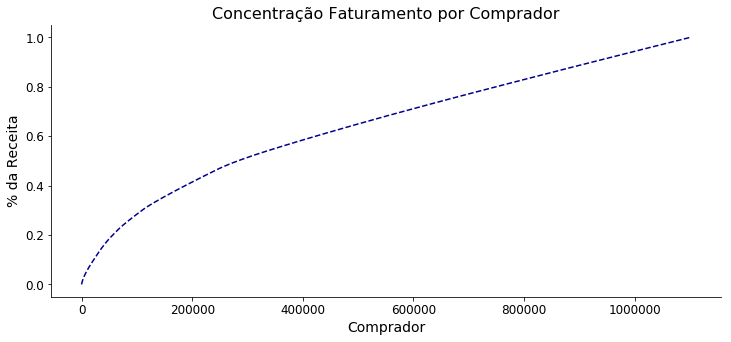

In [728]:
var = 'purchase_value_pos'
g_by = 'buyer_id'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.plot(np.arange(len(vals)), vals['cum'], color = 'darkblue', linestyle = '--')
default_plot_layout(ax, title = 'Concentração Faturamento por Comprador', xlabel = 'Comprador', ylabel = '% da Receita')


Ao contrário do caso dos produtores e afiliados, a base de clientes não sofre desse problema. 80% do Faturamento está distribuído em ~70% da base de clientes. O que nos mostra que a massa de clientes é bem significativa e fragmentada, tornando também mais complexa as ações de marketing para retenção de clientes

### Perfil de Compras
Vamos analisar o perfil de compra dos clientes, verificar possíveis segmentações e extrair hipóteses para aumento de faturamento

In [397]:
group_df = df.groupby(['buyer_id'])['purchase_id'].count().reset_index()
group_df['> 1 compra'] = group_df['purchase_id'] > 1

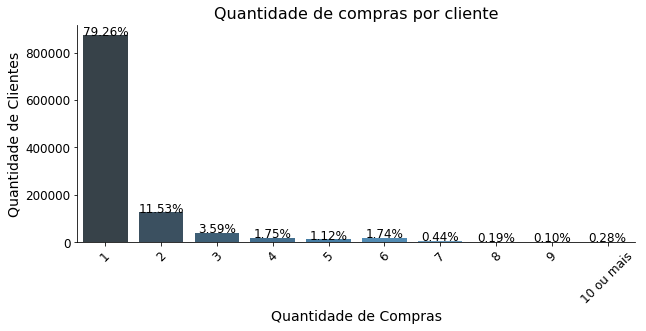

In [406]:
group_df['bucket'] =  group_df['purchase_id'].clip(1,10)
bkt_df = group_df.groupby('bucket')['purchase_id'].count().reset_index()

labels = [str(x) for x in sorted(bkt_df['bucket'].values)]
labels[-1] = "10 ou mais"

plt.figure(figsize=(10, 4))
ax = sns.barplot('bucket', 'purchase_id', data = bkt_df, palette="Blues_d")

total = bkt_df['purchase_id'].sum()
fill_percentage(ax, total)
default_plot_layout(ax, title = 'Quantidade de compras por cliente', xlabel = 'Quantidade de Compras', ylabel = 'Quantidade de Clientes')
    
plt.xticks(np.arange(len(bkt_df)), labels, size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

79% dos clientes compraram apenas uma vez na plataforma em um intervalo de 6 meses. Vamos aprofundar nos grupos de clientes que fazem uma e mais de uma compras para tentar entendê-los. Porém, já tenho uma hipótese de que um bom sistema de recomendação pode aumentar a recorrência dos clientes. A ideia é aumentar a frequência de compras dos clientes dentro da plataforma, uma vez que custos de aquisição de novos clientes são em geral 5 vezes maiores que os custos de retenção. (https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/) 

O foco das próximas análises é gerar insumo para aumentar a retenção de clientes. Vou analisar os seguintes itens: 
* Valor médio gasto 
* Frequência de compra
* Segmentação de clientes
* Potencial de sistemas de recomendação

Vamos verificar o valor de compra relativo médio de cada cliente. 

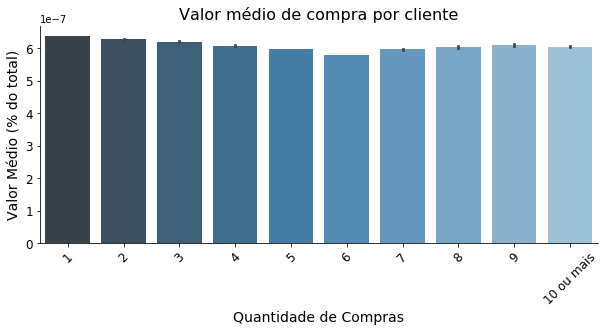

In [101]:
group_df  = pd.DataFrame([])
group = df.groupby(['buyer_id'])

group_df['purchase_id'] = group['purchase_id'].count()
group_df['total_purchase_value'] = group['purchase_value_pos'].sum() / TOTAL_PURCHASE_VALUE
group_df['avg_purchase_value'] = group['purchase_value_pos'].mean() / TOTAL_PURCHASE_VALUE
group_df = group_df.reset_index()
group_df['> 1 compra'] = group_df['purchase_id'] > 1

sbins = np.linspace(0, 11, 11)
labels =  [int(x) for x in bins[1:-1]]
labels = np.append(labels, "{0} ou mais".format(int(round(bins[-2]))))

group_df['bucket'] =  round(pd.cut(group_df['purchase_id'].clip(1,10), bins = bins, labels = bins[1:], right = False), 0)

# bkt_df = group_df.groupby('bucket')['avg_purchase_value'].mean().reset_index()

plt.figure(figsize=(10, 4))
ax = sns.barplot('bucket', 'avg_purchase_value', data = group_df, palette="Blues_d")

default_plot_layout(ax, title = 'Valor médio de compra por cliente', xlabel = 'Quantidade de Compras', ylabel = 'Valor Médio (% do total)')
    
plt.xticks(np.arange(len(group_df['bucket'].unique())), labels, size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

Existe uma leve tendência de redução do valor médio de compra do clientes conforme a quantidade de compras aumenta. Entende-se que clientes mais fieis gastam mais vezes, porém com produtos mais baratos. Nesse ponto, podemos atuar de duas formas: 
* Incentivar gastos maiores para clientes mais fiéis (ganho de margem) 
* Incentivar gastos menores, porém mais frequentes (ganho de volume) 


Assim, vamos entender a frequência de compra dos clientes. 

In [157]:
df_customer = pd.merge(left = df.groupby('buyer_id')['purchase_date'].min().reset_index().rename(columns = {'purchase_date' : 'first_purchase_date'}), right = df, how = 'right', on = 'buyer_id')

df_customer['freq'] = (df_customer['purchase_date'] - df_customer['first_purchase_date']).dt.days
df_customer = df_customer[df_customer['freq'] > 0]


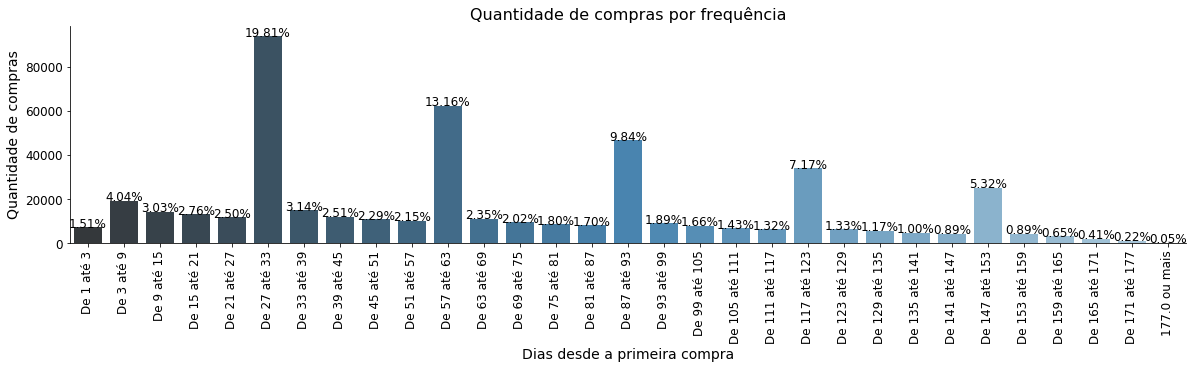

In [158]:
bins = [1]
bins.extend(np.linspace(3, 183, 31))
labels = ["De {0} até {1}".format(int(bins[x]), int(bins[x + 1])) for x  in np.arange(0, len(bins) - 2)]
labels.append('{0} ou mais'.format(bins[-2]))
df_customer['freq_bucket'] = pd.cut(df_customer['freq'], bins = bins, right = False)

group_df = df_customer.groupby('freq_bucket')['purchase_id'].count().reset_index()

plt.figure(figsize=(20, 4))
ax = sns.barplot('freq_bucket', 'purchase_id', data = group_df, palette = "Blues_d")

default_plot_layout(ax, title = 'Quantidade de compras por frequência', xlabel = 'Dias desde a primeira compra', ylabel = 'Quantidade de compras')
total = group_df['purchase_id'].sum()
fill_percentage(ax, total)


plt.xticks(np.arange(len(group_df['freq_bucket'].unique())), labels, size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()


Podemos ver que a maioria das recompras (~55%) são feitas por volta de múltiplos de 30 dias desde a primeira compra, decrescendo com o tempo.

Essa tendência de comportamento dos compradores é interessante para utilizarmos dentro dos sistemas de recomendação, por exemplo podemos a cada período de 30 dias lançar push notifications para os clientes com sugestões de compras, visto que estão mais propícios a conversão. 

### Segmentação

Agora que vimos que existem algumas tendências no comportamento dos compradores em termos de frequência e produtos, vamos realizar uma segmentação dos clientes a fim de identificar clusters de clientes que podemos atuar com maior assertividade. Inicialmente, vamos construir o dataset de clientes se baseando na análise RFM e acrescentar novas variáveis. A sigla RFM representa: 
* Recency 
* Frequency
* Monetary

As novas variáveis a serem criadas estão relacionadas aos produtos adquiridos: 
* Quantidade de categorias e categoria mais frequente
* Quantidade de nichos e nichos mais frequente 

E também ao aparelho no qual o cliente usou para adquirir o produto: 
* Quantidade de aparelhos e aparelho mais frequente

In [67]:
from datetime import datetime
now = datetime(2016,7,1) # considerando a data mais recente como 01/07/2016, uma vez que a última compra no dataset foi feita em jun/2016

In [68]:
rfm_df = df.groupby('buyer_id').agg({'purchase_date': {'recency' : lambda x: (now - x.max()).days},
                                     'purchase_id': {'frequency' : lambda x: x.count()}, 
                                     'purchase_value_pos': {'monetary' : lambda x: x.sum() / TOTAL_PURCHASE_VALUE},
                                     'product_category' : {'Category_Count' : lambda x: x.nunique(), 'Category_Most_Frequent' :  lambda x: x.value_counts().index[0]},
                                     'product_niche' : {'Niche_Count' : lambda x: x.nunique(), 'Niche_Most_Frequent' :  lambda x: x.value_counts().index[0]},
                                     'purchase_device' :{'Device_Count' : lambda x: x.nunique(), 'Device_Most_Frequent' :  lambda x: x.value_counts().index[0]}}).reset_index()


In [89]:
rfm_df.columns =  rfm_df.columns.droplevel()
cols = list(rfm_df.columns)
cols[0] = 'buyer_id'
rfm_df.columns = cols

Um exemplo do Dataset dos clientes criado abaixo. Como podemos ver é uma síntese do status do cliente na base. Por exemplo, a segunda linha indica um cliente que realizou 3 transações na base, usando dois aparelhos e comprou livrous apenas de um único nicho. Nesse caso, podemos pensar em um sistema de recomendação que ajude o cliente a encontrar mais livros daquele nicho ou explorar um pouco mais o catálogo da Hotmart ao indicar outros nichos ou o mesmo, porém para diferentes categorias. 

In [84]:
rfm_df.head()

,buyer_id,Device_Most_Frequent,Device_Count,recency,Niche_Count,Niche_Most_Frequent,frequency,monetary,Category_Count,Category_Most_Frequent
0,1000008,eReaders,1,38,1,Negotiation,1,6.305998e-07,1,Phisical book
1,1000025,Smart TV,2,35,1,Presentation skills,3,1.707415e-06,1,Phisical book
2,1000036,Smart TV,2,62,2,YouTube video creation,6,3.481456e-06,2,Phisical book
3,1000046,Smart TV,2,25,2,Physics,7,3.967550e-06,2,Phisical book
4,1000048,Cellphone,1,50,2,Government,2,1.165298e-06,1,Phisical book


Para segmentação, vamos considerar apenas clientes que fizeram mais de uma compra. Ou seja, queremos segmentar a base de clientes mais fiéis.

In [9]:
rfm_df = rfm_df[rfm_df['frequency'] > 1].reset_index()

In [10]:
## std all columns
num_cols =  ['recency', 'frequency', 'monetary', 'Category_Count', 'Niche_Count', 'Device_Count']
cat_cols =  ['Category_Most_Frequent', 'Niche_Most_Frequent', 'Device_Most_Frequent']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfm_df_scaled = pd.DataFrame(scaler.fit_transform(rfm_df[num_cols]), columns = num_cols).reset_index().drop(columns = 'index')
dum_df = pd.get_dummies(rfm_df[cat_cols], drop_first  = True)
rfm_df_scaled = pd.concat([rfm_df_scaled, dum_df], axis = 1)

Por causa das variáveis categóricas obtivemos um dataset com mais de 40 colunas, não são muitas, mas já pode prejudicar o Kmeans na clusterização. Assim, vou rodar o PCA para reduzir dimensionalidade



In [11]:
from sklearn.decomposition import PCA
n_comp = 10

pca = PCA(n_comp)
pca.fit(rfm_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

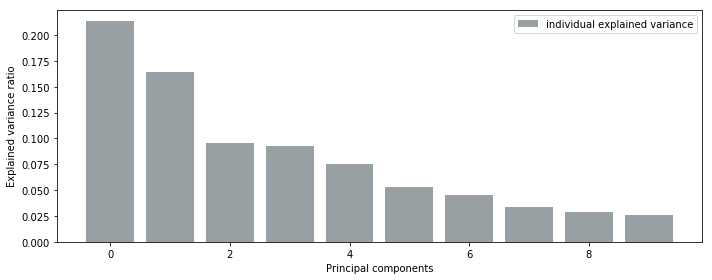

In [111]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', color = '#324249',
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Escolhendo 10 componentes, obtivemos ~80% de variância explicada.

In [12]:
rfm_df_scaled_pca = pd.DataFrame(pca.transform(rfm_df_scaled))

Uma vez que agora temos poucas colunas, vamos rodar o método de elbow para encontrarmos uma estimativa inicial do melhor número de clusters desse dataset.

In [14]:
from sklearn.cluster import KMeans
num_clusters = np.arange(2, 20)

kmeans = [KMeans(n_clusters = i) for i in num_clusters]
score = [km.fit(rfm_df_scaled_pca).score(rfm_df_scaled_pca) for km in kmeans]

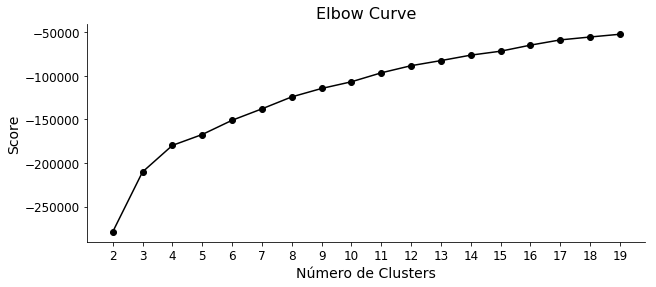

In [116]:
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
plt.plot(num_clusters, score, 'k-o')
default_plot_layout(ax, title = 'Elbow Curve', xlabel = 'Número de Clusters', ylabel = 'Score')
plt.xticks(num_clusters)
plt.show()

Esse tipo de análise é bastante subjetivo, principalmente em casos como acima (onde não podemos ver claramente um elbow) Como apresentado no gráfico acima, 4 clusters é o melhor. Vamos rodar então o Kmeans para 3 clusters

In [15]:
from sklearn.cluster import KMeans

best_num_clusters = 4
model = KMeans(n_clusters = best_num_clusters).fit(rfm_df_scaled_pca)
rfm_df_scaled_pca['cluster_id'] = model.labels_
rfm_df_scaled['cluster_id'] = model.labels_

Vamos escolher as 3 primeiras componentes do PCA para visualizar os clusters. 

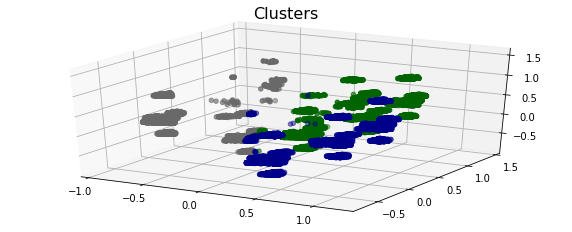

In [121]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

markers =  ['o', '^', 's', 'D']
colors = ['#f77754', '#584b42', '#537d91', '#a4d1c8']
colors = ['dimgray', 'darkblue', 'darkgreen', 'darkred']


fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection = '3d')

i = 0
for cluster, df_cluster in rfm_df_scaled_pca.groupby('cluster_id'):
    ax.scatter(df_cluster[0], df_cluster[1], df_cluster[2], marker = 'o', facecolor = colors[i])
    i += 1

plt.title('Clusters', size = 16)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

plt.show()

Existe uma certa separação dos clsuters visualmente pelo Scatter Plot 3D. Porém, um importante drawback de usar PCA ou qualquer outra técnica de transformação das features antes da cluterização é que não temos um senso claro do que significa cada cluster, por isso vamos passar de volta os clusters para as features originais para entendê-los.

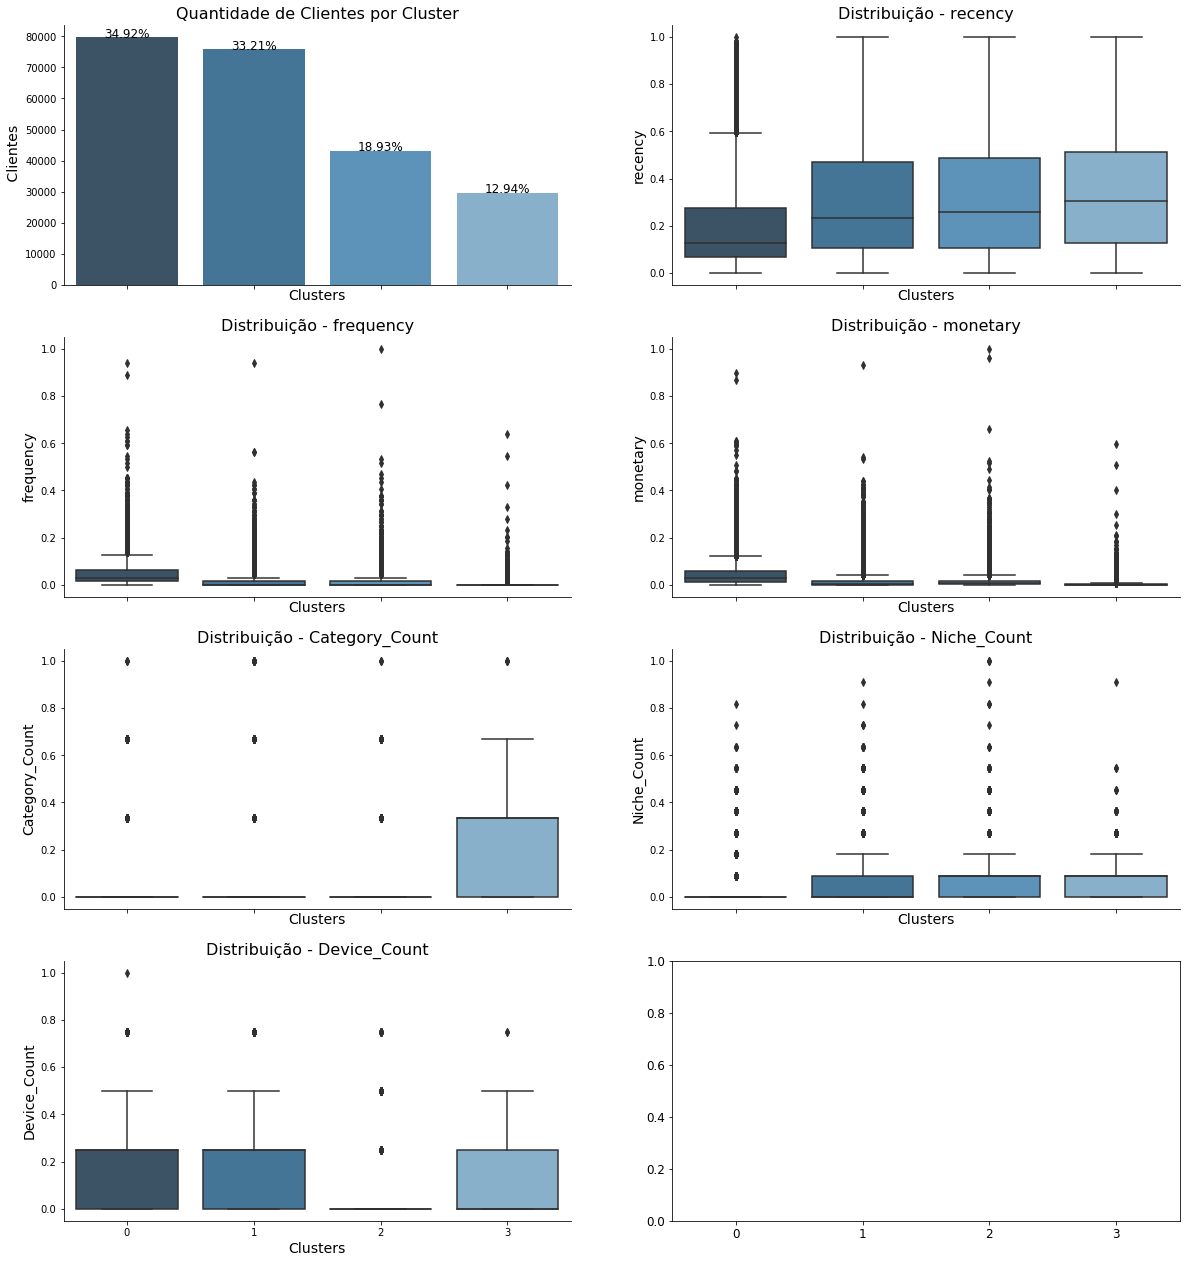

In [127]:
cols = num_cols

fig, axis = plt.subplots(4, 2, sharex = True, figsize = (20,22))

ax =  sns.countplot('cluster_id', data = rfm_df_scaled, ax = axis[0, 0], palette = "Blues_d")
total = len(rfm_df)
fill_percentage(ax, total)
default_plot_layout(ax, title = 'Quantidade de Clientes por Cluster', xlabel = 'Clusters', ylabel = ' Clientes')

j = 1
i = 0
for col in num_cols:
    ax = sns.boxplot('cluster_id', col, data = rfm_df_scaled, ax = axis[i,j], palette = "Blues_d")
    default_plot_layout(ax, title = 'Distribuição - {0}'.format(col), xlabel = 'Clusters', ylabel = col)

    j += 1
    if j > 1:
        j = 0
        i += 1
    
# axis[1,1].set_ylim(5,30)
# axis[0,1].set_ylim(1,12)
plt.show()

Sobre as variáveis numéricas, apesar da grande quantidade de outliers, o cluster 0 possui clientes com maior range de frequências e com recência menor. É também o cluster com menor quantidade de Categorias e Nichos. Podemos dizer que esse cluster ou não está propenso a explorar diferentes conteúdos ou não tem conhecimento. 

Podemos aprofundar nos insights dados pelos clusters e melhorá-los a fim de construirmos features e definirmos melhor um sistema de recomendação para aumentar engajamento dos clientes no rede.

Vamos verificar algumas variáveis categóricas (as quais transformamos em variáveis dummy) para tentar extrair mais insights.

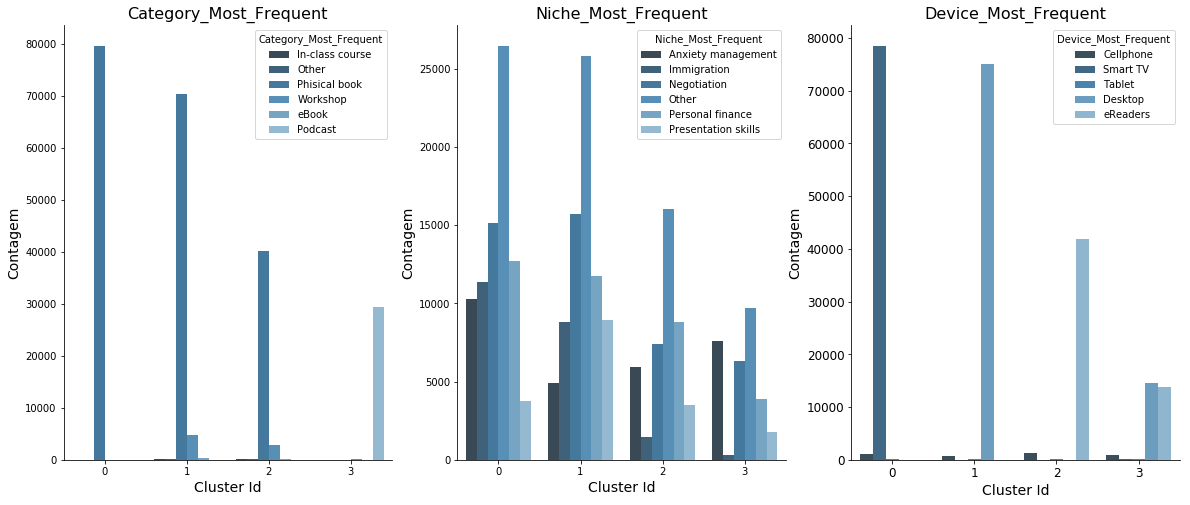

In [63]:
top_k = 5
rfm_df['cluster_id'] = model.labels_
cat_cols =  ['Category_Most_Frequent', 'Niche_Most_Frequent', 'Device_Most_Frequent']

rfm_df_aux = rfm_df.copy(deep = True)

for col in cat_cols: 
    top_cat = rfm_df_aux[col].value_counts().index[:top_k]
    rfm_df_aux[col] = np.where(rfm_df_aux[col].isin(top_cat), rfm_df_aux[col], 'Other')    

fig, axis = plt.subplots(1, 3, figsize = (20,8))
i = 0
for col in cat_cols: 
    col_cluster = rfm_df_aux.groupby(['cluster_id', col])['index'].count().reset_index()
    ax = sns.barplot('cluster_id', 'index', hue = col, data = col_cluster,  palette = "Blues_d", ax = axis[i])
    default_plot_layout(ax, title = col, xlabel = 'Cluster Id', ylabel = 'Contagem')
    total = col_count['index'].sum()
    i+=1

Nesse análise, mantivemos apenas os top 5 mais frequentes, o restante substituímos por 'Other'. Nesse caso, podemos ver algumas diferenciações entre os clusters. No caso da Categoria, podemos ver que cluster 3 é voltado para clientes de Podcast, enquanto o restante em Livros. Já para os Nichos, cluster 3 é mais voltado para Anxiety Management e o restante é dominado por Negotiation (desconsiderando o 'Other').  Finalmente, em relação aos dispositivos, houve maior discriminação:
* Cluster 0 para clientes que preferem Smart Tv
* Cluster 1 para clientes que preferem Desktop 
* Cluster 2 para clientes que preferem EReaders 
* Já cluster 3 possuem tanto clientes que preferem Desktop quanto eReaders.

A quantidade de análises para segmentação desses clientes pode aumentar muito, porém é necessário um drive de negócio muito grande para escolher as features e objetivos de uma segmentação mais clara. Nesse caso, podemos ver que a segmentação pode ser sim útil para entedermos os clientes e construírmos uma política de retenção apropriada, como o sistema de recomendação que viemos falando ao longo dessa análise. 

<a id="produtos"></a>
## Produtos

### Overview

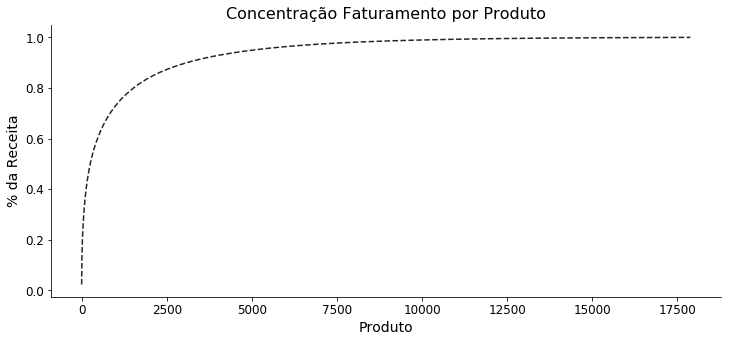

In [56]:
var = 'purchase_value_pos'
g_by = 'product_id'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.plot(np.arange(len(vals)), vals['cum'], color = '#162936', linestyle = '--')
default_plot_layout(ax, title = 'Concentração Faturamento por Produto', xlabel = 'Produto', ylabel = '% da Receita')


Novamente, vemos uma concentração alta de faturamento, dessa vez nos produtos. ~9% dos produtos concentram 80% do faturamento. Vamos verificar o faturamento pelas diferentes categorias e nichos dos produtos.

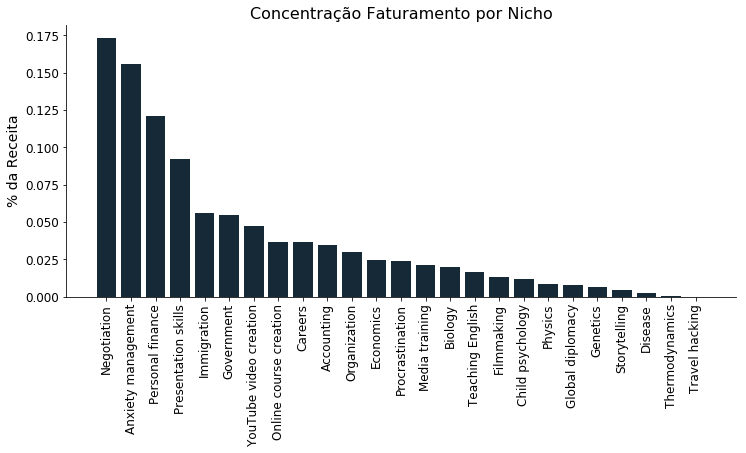

In [682]:
var = 'purchase_value_pos'
g_by = 'product_niche'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])

plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.bar(np.arange(len(vals)), vals['purchase_value_pos'], color = '#162936')
plt.xticks(np.arange(len(vals)), vals[g_by], rotation = 90)
default_plot_layout(ax, title = 'Concentração Faturamento por Nicho', xlabel = '', ylabel = '% da Receita')


plt.show()

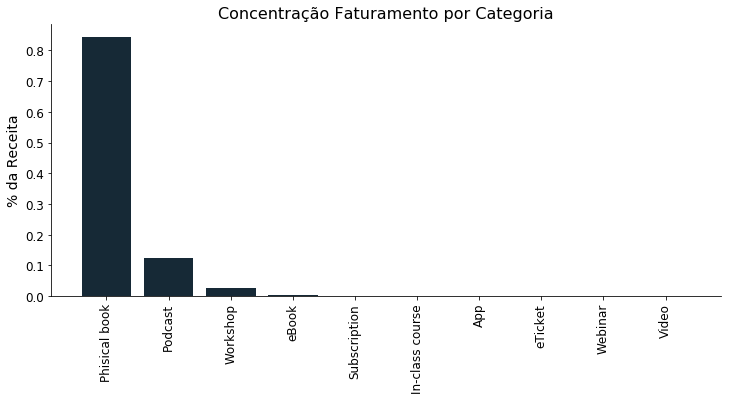

In [77]:
var = 'purchase_value_pos'
g_by = 'product_category'
vals = df.groupby([g_by])[var].sum().reset_index().sort_values(by = var, ascending = False)
vals['purchase_value_pos']  = vals[var] / vals[var].sum()
vals['cum']=  np.cumsum(vals[var])


plt.figure(figsize=(12, 5))
ax = plt.subplot(111)

plt.bar(np.arange(len(vals)), vals['purchase_value_pos'], color = '#162936')
plt.xticks(np.arange(len(vals)), vals[g_by], rotation = 90)
default_plot_layout(ax, title = 'Concentração Faturamento por Categoria', xlabel = '', ylabel = '% da Receita')

plt.show()

Alguns tipos de produtos são mais populares do que os outros como materiais relacionados a negociação, ansiedade e finanças pessoais. Livros físicos são a grande maioria de vendas (mais de 80% do faturamento), enquanto Podcasts representam outros ~12%. Vimos também, na seção de [Produtores](#produtores) que os produtos criados mais recentes (desde 2015) são mais vendidos. Estes são alguns fatores que influenciam no sucesso dos produtos. Mais para frente, veremos que a precificação também pode ter impactos no sucesso dos produtos.

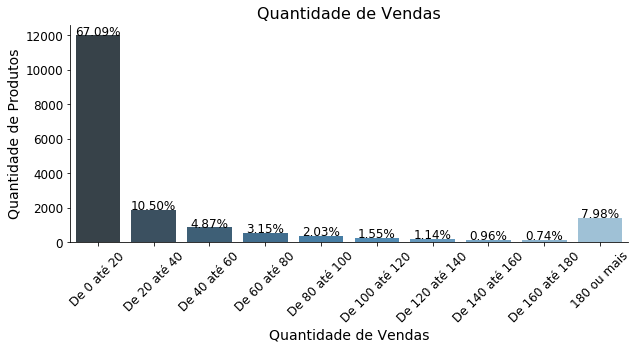

In [86]:
prds = df.groupby('product_id')['purchase_id'].count().reset_index()
prds['more_than_one'] = prds['purchase_id'] > 10

bins = np.linspace(0, 200, 11)
labels = ["De {0} até {1}".format(int(bins[x]), int(bins[x + 1])) for x  in np.arange(0, len(bins) - 2)]
labels.append('{0} ou mais'.format(int(bins[-2])))

prds['count'] = pd.cut(prds['purchase_id'].clip(1,190), bins = bins, right = False)
prds = prds.groupby('count')['purchase_id'].count().reset_index()


plt.figure(figsize=(10, 4))
ax = sns.barplot('count', 'purchase_id', data = prds, palette="Blues_d")

default_plot_layout(ax, title = 'Quantidade de Vendas', xlabel = 'Quantidade de Vendas', ylabel = 'Quantidade de Produtos')
total = prds['purchase_id'].sum()
fill_percentage(ax, total)

plt.xticks(np.arange(len(labels)), labels, size = 12, rotation = 45)
plt.show()

Já em termos de vendas dos produtos, vemos que grande parte dos produtos foram vendidos menos de 20 vezes. Vemos então grande potencial para aumentar vendas desse grupo de produtos, uma vez que os produtos já estão na plataforma. Podemos potencializar a venda por meio de sistemas de recomendação (como já citado anteriormente) e de outras formas (como precificação, explorado um pouco mais abaixo).

### A Priori 

Vamos usar o algoritmo <i> A Priori </i> para entender a relação de compra dos produtos. Nesse caso, podemos utilizar esse tipo de informação para sugerir outros produtos para os clientes assim como grandes e-commerces fazem como Amazon. Pode ser um versão inicial do sistema de recomendação que vem sido citado.


Como exemplo, vamos filtrar a base de para clientes que compraram mais de 5 vezes e produtos que foram comprados mais de 5 vezes. 



In [331]:
df_aux = df.copy(deep = True)
# df_aux = df_aux[df_aux['purchase_date'].dt.month >= 4]

df_aux['quantity'] = [1] * len(df_aux)

df_customer = df_aux.groupby(['buyer_id', 'product_id'])['purchase_id'].count().reset_index()
df_customer = df_customer[df_customer['purchase_id'] == 1]
df_aux = df_aux[(df_aux['buyer_id'].isin(list(df_customer['buyer_id'].values))) & (df_aux['product_id'].isin(list(df_customer['product_id'].values)))]

df_customer = df_aux.groupby(['buyer_id'])['purchase_id'].count().reset_index()
df_customer = df_customer[df_customer['purchase_id'] > 1]
df_aux = df_aux[(df_aux['buyer_id'].isin(list(df_customer['buyer_id'].values)))]

df_customer = df_aux.groupby(['product_id'])['purchase_id'].count().reset_index()
df_customer = df_customer[df_customer['purchase_id'] > 5]
df_aux = df_aux[(df_aux['product_id'].isin(list(df_customer['product_id'].values)))]

basket = pd.pivot_table(data=df_aux,index='buyer_id',columns='product_id',values='quantity',   aggfunc='sum', fill_value=0).clip(0,1)

In [332]:
len(df_aux)

417034

In [114]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [338]:
frequent_itemsets = apriori(basket, min_support = 0.005, use_colnames=True)

In [340]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

Geramos a tabela de regras de associação utilizando o algoritmo <i> a priori </i>. Nesse caso, estamos ordenando pelos indicadores <i> lift </i> e <i> confidence </i>. 

* Lift indica quantas vezes mais o antecedente e o consequente ocorrem juntos do que se eles fossem estatisticamente independentes. 
* Confidence indica a probabilidade de encontrarmos o consequente em clientes que compraram o antecendente 

In [341]:
rules.sort_values(by = ['lift', 'confidence'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(174743),(131926),0.008175,0.016254,0.007720,0.944351,58.099599,0.007587,17.677618
3,(131926),(174743),0.016254,0.008175,0.007720,0.474979,58.099599,0.007587,1.889114
0,(70559),(63718),0.008610,0.018418,0.008348,0.969576,52.641572,0.008189,32.263036
1,(63718),(70559),0.018418,0.008610,0.008348,0.453219,52.641572,0.008189,1.813139
5,(167328),(130294),0.006852,0.021196,0.006652,0.970825,45.801469,0.006507,33.549338
4,(130294),(167328),0.021196,0.006852,0.006652,0.313821,45.801469,0.006507,1.447361


Logo, a tabela acima informa que ao comprar o antecendente, dentro dos dados selecionados, há uma probabilidade relevante de se comprar o consequente. Vamos tentar entender a primeira regra encontrada para verificar similaridades entre os dois produtos.

In [346]:
df[df['product_id'] == '174743'].head(1)[['product_id', 'producer_id', 'product_category', 'product_niche']]

,product_id,producer_id,product_category,product_niche
36134,174743,5502,Phisical book,Online course creation


In [347]:
df[df['product_id'] == '131926'].head(1)[['product_id', 'producer_id', 'product_category', 'product_niche']]

,product_id,producer_id,product_category,product_niche
451,131926,5502,Phisical book,Online course creation


Podemos ver que ambos são do mesmo produtor e com mesmo nicho e categoria. 

In [377]:
customers_p1 = list(df[df['product_id'] == '174743']['buyer_id'].unique())
customers_p2 = list(df[df['product_id'] == '131926']['buyer_id'].unique())
customers_not_both =  set(customers_p1) ^ set(customers_p2)
customers_all = set(customers_p1).union(set(customers_p2))

In [380]:
print(len(customers_p1), 'clientes compraram produto 174743')
print(len(customers_p2), 'clientes compraram produto 131926')
print('Temos um total de',len(customers_all), 'clientes distintos')
print(len(customers_both), 'clientes compraram apenas um dos dois produtos')

1314 clientes compraram produto 174743
6544 clientes compraram produto 131926
Temos um total de 6736 clientes distintos
5614 clientes compraram apenas um dos dois produtos


Para a primeira regra, então, temos um total de 5614 clientes que compraram apenas um dos produtos. Esses são clientes potenciais que podemos recomendar o produto e há uma probabilidade maior de conversão.

Este é um exemplo simples de potencial recomendação. Existem, claro, métodos mais avançados e precisos. Outros métodos simples, porém poderosos são métodos que usam matrix factorization. Youtube, Netflix e outros gigantes em recomendação usam um mix de matrix factorization e deep learning garantir maior precisão em suas recomendações.

### Precificação

Vamos tentar entender a precificação dos produtos e a relação entre vendas e preço

/usr/local/lib/python3.5/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


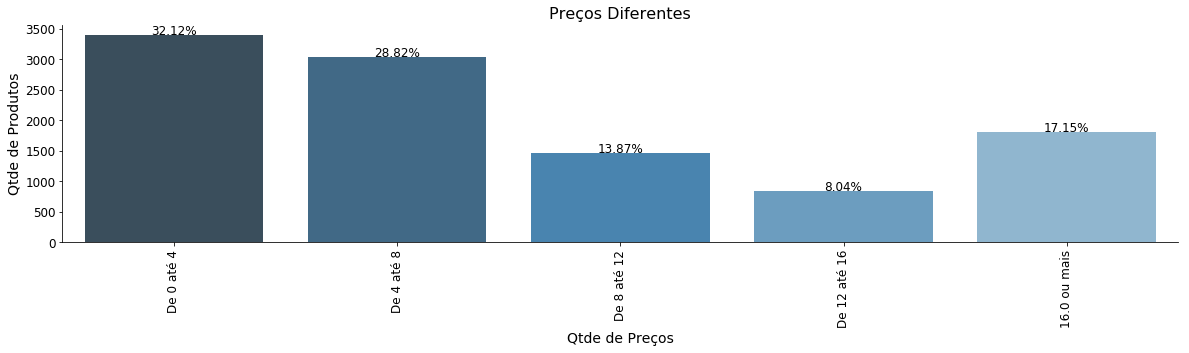

In [154]:
diff_prices_count =  df.groupby('product_id').agg({
        'purchase_value_pos' : {
            'num_diff_prices' : lambda x: x.nunique(),
            'count' : lambda x: x.count()}}).reset_index()
diff_prices_count.columns = diff_prices_count.columns.droplevel()
cols = list(diff_prices_count.columns)
cols[0] = 'product_id'
diff_prices_count.columns = cols

diff_prices_count = diff_prices_count[diff_prices_count['count'] > 4]
diff_prices_count['num_diff_prices'] = diff_prices_count['num_diff_prices'].clip(1, 16)

diff_prices_count = diff_prices_count.sort_values(by = 'num_diff_prices', ascending = False)
diff_prices_count['sales per price'] = diff_prices_count['count'] / diff_prices_count['num_diff_prices']

bins = []
bins.extend(np.linspace(0, 20, 6))
labels = ["De {0} até {1}".format(int(bins[x]), int(bins[x + 1])) for x  in np.arange(0, len(bins) - 2)]
labels.append('{0} ou mais'.format(bins[-2]))
diff_prices_count['bin_price'] = pd.cut(diff_prices_count['num_diff_prices'], bins = bins, right = False)

group_df = diff_prices_count.groupby('bin_price')['product_id'].count().reset_index()

plt.figure(figsize=(20, 4))
ax = sns.barplot('bin_price', 'product_id', data = group_df, palette = "Blues_d")

default_plot_layout(ax, title = 'Preços Diferentes', xlabel = 'Qtde de Preços', ylabel = 'Qtde de Produtos')
total = group_df['product_id'].sum()
fill_percentage(ax, total)


plt.xticks(np.arange(len(group_df['bin_price'].unique())), labels, size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()

Estamos analisando apenas produtos que foram vendidos 5 vezes ou mais. Nesse caso, ~40% dos produtos possuem 8 ou mais preços distintos na base. O preço, então, varia em muitos produtos. Vamos analisar quais são os motivos para essa variação e se essa variação é de fato significativa.

Algumas hipóteses para variação de preço são: 
* Afiliados distintos ou venda direta pelo produtor e/ou comissões distintas
* Dispositivos distintos
* Origem da compra (purchase_origin)

Vamos então gerar o mesmo gráfico, porém agrupando por todos critérios que podem modificar o preço citados. 

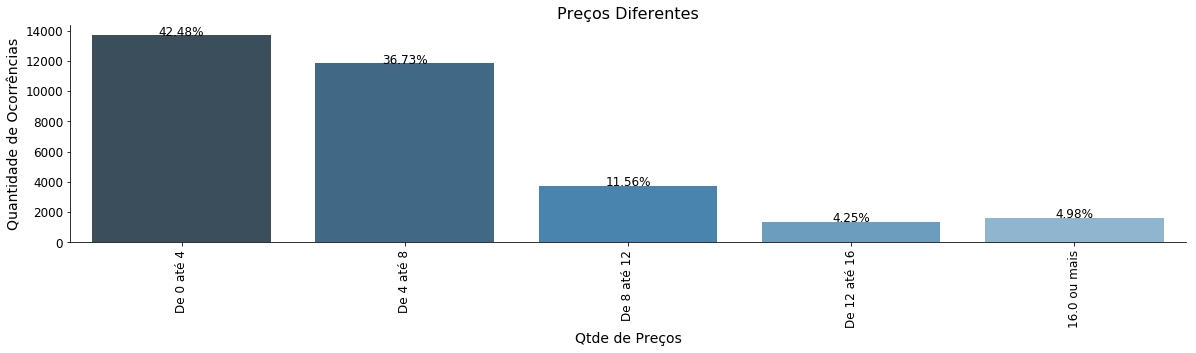

In [354]:
diff_prices_count =  df.groupby(['product_id', 'affiliate_id', 'purchase_device', 'purchase_origin', 'affiliate_commission_percentual']).agg({
        'purchase_value_pos' : {
            'num_diff_prices' : lambda x: x.nunique(),
            'count' : lambda x: x.count()}}).reset_index()
diff_prices_count.columns = diff_prices_count.columns.droplevel()
cols = list(diff_prices_count.columns)
cols[0] = 'product_id'
diff_prices_count.columns = cols

diff_prices_count = diff_prices_count[diff_prices_count['count'] > 4]
diff_prices_count['num_diff_prices'] = diff_prices_count['num_diff_prices'].clip(1, 16)

diff_prices_count = diff_prices_count.sort_values(by = 'num_diff_prices', ascending = False)
diff_prices_count['sales per price'] = diff_prices_count['count'] / diff_prices_count['num_diff_prices']

bins = []
bins.extend(np.linspace(0, 20, 6))
labels = ["De {0} até {1}".format(int(bins[x]), int(bins[x + 1])) for x  in np.arange(0, len(bins) - 2)]
labels.append('{0} ou mais'.format(bins[-2]))
diff_prices_count['bin_price'] = pd.cut(diff_prices_count['num_diff_prices'], bins = bins, right = False)

group_df = diff_prices_count.groupby('bin_price')['product_id'].count().reset_index()

plt.figure(figsize=(20, 4))
ax = sns.barplot('bin_price', 'product_id', data = group_df, palette = "Blues_d")

default_plot_layout(ax, title = 'Preços Diferentes', xlabel = 'Qtde de Preços', ylabel = 'Quantidade de Ocorrências')
total = group_df['product_id'].sum()
fill_percentage(ax, total)


plt.xticks(np.arange(len(group_df['bin_price'].unique())), labels, size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()

Vemos então que existe variação do preço de um mesmo produto, afiliado, comissão, dispositivo e origem. Ou seja, a precificação dos produtos é de certo modo dinâmica. Vamos entender se a variação de preço tem melhorado a performance em vendas.

Calculando a variação entre o preço e a mediana para a chave composta de (product, afiliado, dispositivo, origem e comissão) 

In [7]:
median_price =  df.groupby(['product_id', 'affiliate_id', 'purchase_device', 'purchase_origin', 'affiliate_commission_percentual'])['purchase_value_pos'].median().reset_index()
median_price = median_price.rename(columns = {'purchase_value_pos' : 'median_price'})


df_median = pd.merge(left = df, right = median_price, on = ['product_id', 'affiliate_id', 'purchase_device', 'purchase_origin', 'affiliate_commission_percentual'], how ='left')
df_median['variation'] = (df_median['purchase_value_pos'] - df_median['median_price']) / df_median['median_price']

In [20]:
df_median_week = df_median.groupby(['product_id', 'affiliate_id', 'purchase_device', 'purchase_origin', 'affiliate_commission_percentual', pd.Grouper(key = 'purchase_date', freq ='W-MON')]).agg({'variation' : {'mean_price' : lambda x: x.mean()},
                                                                                        'purchase_id' : {'sales' : lambda x: x.count()}}).reset_index()

df_median_week.columns = df_median_week.columns.droplevel()
cols = list(df_median_week.columns)
cols[0] = 'product_id'
cols[1] = 'affiliate_id'
cols[2] = 'purchase_device'
cols[3] = 'purchase_origin'
cols[4] = 'affiliate_commission_percentual'
cols[5] = 'purchase_date'
df_median_week.columns = cols

In [30]:
df_median_week = df_median_week.sort_values(by = 'purchase_date')

group = df_median_week.groupby(['product_id', 'affiliate_id', 'purchase_device', 'purchase_origin', 'affiliate_commission_percentual'])


df_product = pd.DataFrame([])

df_product['number_changes'] = group['mean_price'].nunique()
df_product['change'] = group['mean_price'].std()
df_product['increase'] = (group['sales'].sum()) / (group['sales'].count() * group['sales'].first())
df_product['total'] = group['sales'].sum()
df_product['weeks'] = group['sales'].count()
df_product = df_product.reset_index()

In [82]:
df_product_filtered = df_product[df_product['weeks'] > 4]
df_product_filtered = df_product_filtered[df_product_filtered['total'] > 20]
df_product_filtered = df_product_filtered[df_product_filtered['increase'] < 5]
df_product_filtered['perc_change'] = df_product_filtered['number_changes'] / df_product_filtered['weeks']

Vamos avaliar para produtos que foram vendidos por mais de 4 semanas (não necessariamente semanas seguidas) e que tiveram volume vendido maior que 20 (considerável, sabendo que grande parte dos produtos foram vendidos menos do que 20 vezes). Nessa análise estamos avaliando o quanto foi a venda totalo  (em todas semanas) em razão de um baseline. Esse baseline foi assumido como se o volume vendido na primeira semana se repetisse em todas as demais, portanto se a razão for maior que 1, significa que o produto foi vendido mais que o baseline. 

Vamos analisar essa razão pela quantidade de alterações de preço (quantidade de preços distintos pela quantidade de semnanas que o produto foi vendido, um proxy da dinamicidade da precificação daquele produto).

O que queremos analisar aqui é se quanto maior essa dinamicidade de preço, maior o aumento relativo de vendas, sugerindo que a precificação é adequada. 


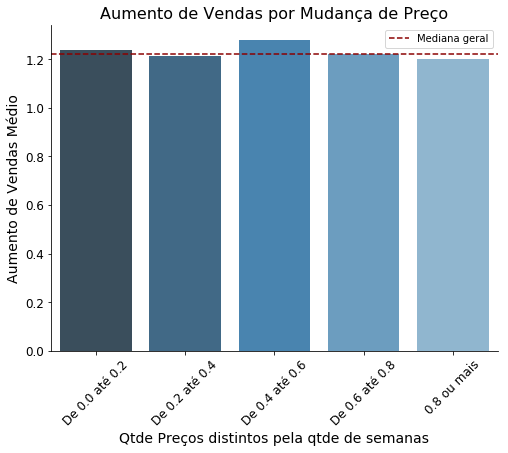

In [83]:
bins = np.linspace(0, 1, 6)
labels = ["De {0} até {1}".format(round(bins[x], 1), round(bins[x + 1], 1)) for x  in np.arange(0, len(bins) - 2)]
labels.append('{0} ou mais'.format(bins[-2]))
df_product_filtered['change_bin'] = pd.cut(df_product_filtered['perc_change'], bins = bins, right = True, include_lowest = True)

increase_df = df_product_filtered.groupby('change_bin')['increase'].median().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot('change_bin', 'increase', data = increase_df, palette = "Blues_d")
line = ax.axhline(df_product_filtered['increase'].median(), linestyle = '--', color = 'darkred')
plt.legend((line,),('Mediana geral',))

default_plot_layout(ax, title = 'Aumento de Vendas por Mudança de Preço', xlabel = 'Qtde Preços distintos pela qtde de semanas', ylabel = 'Aumento de Vendas Médio')
plt.xticks(np.arange(len(increase_df)), labels, rotation = 45)
plt.show()

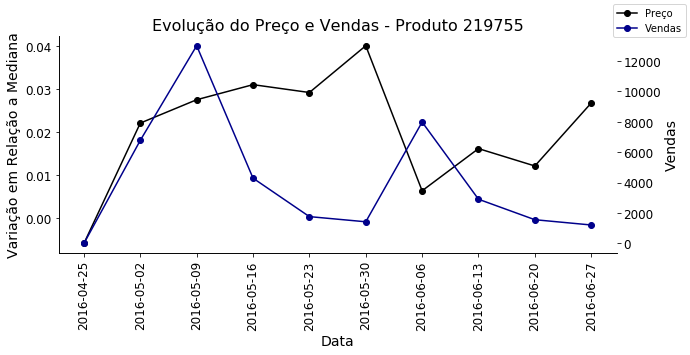

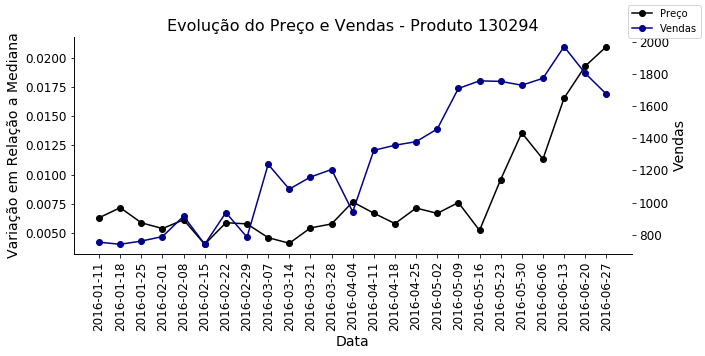

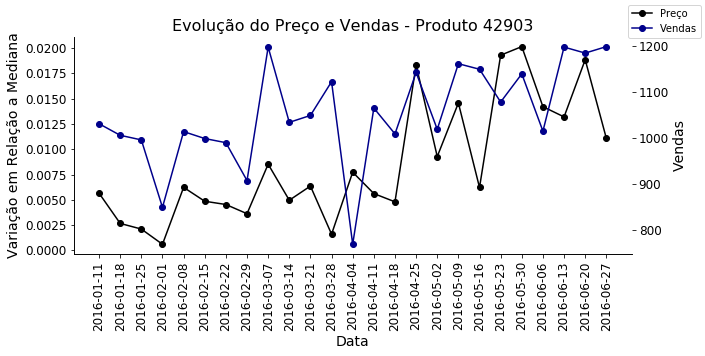

In [687]:
median_price =  df.groupby(['product_id'])['purchase_value_pos'].median().reset_index()
median_price = median_price.rename(columns = {'purchase_value_pos' : 'median_price'})


df_median = pd.merge(left = df, right = median_price, on = ['product_id'], how ='left')
df_median['variation'] = (df_median['purchase_value_pos'] - df_median['median_price']) / df_median['median_price']

df_median_week = df_median.groupby(['product_id', pd.Grouper(key = 'purchase_date', freq ='W-MON')]).agg({'variation' : {'mean_price' : lambda x: x.mean()},
                                                                                        'purchase_id' : {'sales' : lambda x: x.count()}}).reset_index()

df_median_week.columns = df_median_week.columns.droplevel()
cols = list(df_median_week.columns)
cols[0] = 'product_id'
cols[1] = 'purchase_date'
df_median_week.columns = cols

products = df['product_id'].value_counts().index[:3]

for pr in products: 
    mask = (df_median_week['product_id'] == pr)

    plt.figure(figsize=(10, 4))

    ax = plt.subplot(111)
    plt.plot(np.arange(len(df_median_week[mask].iloc[1:-1]['purchase_date'])), df_median_week[mask].iloc[1:-1]['mean_price'], 'k-o')
    default_plot_layout(ax, title = 'Evolução do Preço e Vendas - Produto {0}'.format(pr), xlabel = 'Data', ylabel = 'Variação em Relação a Mediana')
    plt.xticks(np.arange(len(df_median_week[mask].iloc[1:-1]['purchase_date'])), df_median_week[mask].iloc[1:-1]['purchase_date'].dt.date,  rotation = 90)

    ax2 = ax.twinx()
    ax2.plot(np.arange(len(df_median_week[mask].iloc[1:-1]['purchase_date'])), df_median_week[mask].iloc[1:-1]['sales'], color = 'darkblue', marker = 'o')
    default_plot_layout(ax2, title = '', xlabel = '', ylabel = 'Vendas')
    plt.figlegend(('Preço', 'Vendas'))

    plt.show()

Para o produto 219755 (cima), houveram dois picos de aumento de vendas (relacionadas a algum fator externo), nas últimsa semanas,houve tendência de queda de preço, porém o produto se valorizou ao longo do tempo. Entretanto, a tendência tem sido de queda.

Já no caso do produto 130294 (meio), o produto teve aumento de vendas em praticamente todas as semanas com exceção das 2 últimas. No caso das últimas semanas, houve um grande aumento de preço, porém as vendas não acompanharam.

Já para o produto 42903 (baixo), o preço e as vendas aparentemente se mostraram bem correlacionados a partir Maio/2016.

Seria interessante obtermos dados de visualizações dos produtos na plataforma para termos um entendimento melhor do impacto do preço, porém é visível o diferença entre os produtos. 

Nesse caso, uma análise de segmentação de produtos / clientes poderia nos ajudar a construir políticas de precificação para grupos de produtos que se comportam de maneira semelhante.

<a id="conclusoes"></a>
## Conclusões

O Intuito dessa EDA era analisar as principais dimensões da base de vendas (produtos, produtores, clientes e afiliados) para levar hipóteses de como podemos aumentar em receita. 

A base poderia ser enriquecida com mais dados para análises mais aprofundadas, como dados de perfil dos clientes, como cliente / afiliado / produtor interage na plataforma. 


No entanto, a base é rica e levantamos as seguintes recomendações: 
* Clientes: entender perfis e construir sistema de recomendação para aumentar retenção / conversão
* Produtos: aumentar venda por meio de recomendação e estudar impacto da precificação na performance de vendas
* Produtores: diversificação de categorias / nichos pode aumentar performance em vendas
* Afiliados: Afiliados devem estar alinhados a comissão praticada no nicho em que estão atuando